In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
R = 8.314
TR, PR = 272.95, 9290 #http://www.ddbst.com/en/EED/PCP/VAP_C4.php

#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

In [3]:
# Diffusion coefficients in air as formula's at atmospheric pressure
# REF: Carl L. Yaws Transport Properties of Chemicals and Hydrocarbons. DOI: 10.1016/B978-0-323-28658-9.00010-X, Chapter 10: Diffusion Coefficient in Air – Organic Compounds

DGR_H2O = 0.2523 * 10**(-4) #[m2/s]
DGR_Actt = 0.1240 * 10**(-4) #[m2/s]
DGR_MetOH = 0.1526 * 10**(-4) #[m2/s]
DGR_EtOH = 0.1186 * 10**(-4) #[m2/s] 
DGR_PropOH = 0.0997 * 10**(-4) #[m2/s] 
DGR_ButOH = 0.0864 * 10**(-4) #[m2/s] 
DGR_Butnon = 0.0906 * 10**(-4) #[m2/s] butanone, aka methyl ethyl ketone
DGR_Butyrt = 0.0778 * 10**(-4) #[m2/s] butyric acid
DGR_Butdiol = 0.0861 * 10**(-4) #[m2/s] 1,2-butanediol
DGR_Actn = 0.1053 * 10**(-4) #[m2/s] 

In [4]:
R = 8.314
#T_R = 298.15

def celsius(t):
    return t-273.15

#Reactor
F_L = 1 * 10**-3 #Fluid inflow rate with C-source supplement [m^3]
F_G = 1*10**4 #gas inflow rate (from Steph: (8*10**5 * 8.314 * T)/p_m) [m^3/h]
r = 3 # radius of the reactor [m]
h = 30 # height of the reactor [m]

#deduceable parameters
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h * 2/3 #reactor volume, assuming it is 2/3 filled [m^3]
v_gas = F_G/A/3600 #average gas velocity [m/s]
Gas_holdup = 0.6*(v_gas)**0.7 #from Stephanie's paper
V_G = V_L*Gas_holdup
c_H2O = 10**6/18 #[mM] concentration of water (in pure water) for mol fraction calculation

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

d_vs = 0.005 # [m] bubble diameter, mid of range for coarse bubbles

KLaR_O2 = 0.32 * v_gas**0.7

theta = 1.022 # temperature correction factor

In [5]:
a = 6 * 0.6 * (v_gas)**0.7 / d_vs

def kGa(DGR, t):
    kGR = 2/3.6 * 10**3 * d_vs * DGR**0.5 * v_gas**0.18
    return kGR * a * theta**(t-293.15) #[1/s]

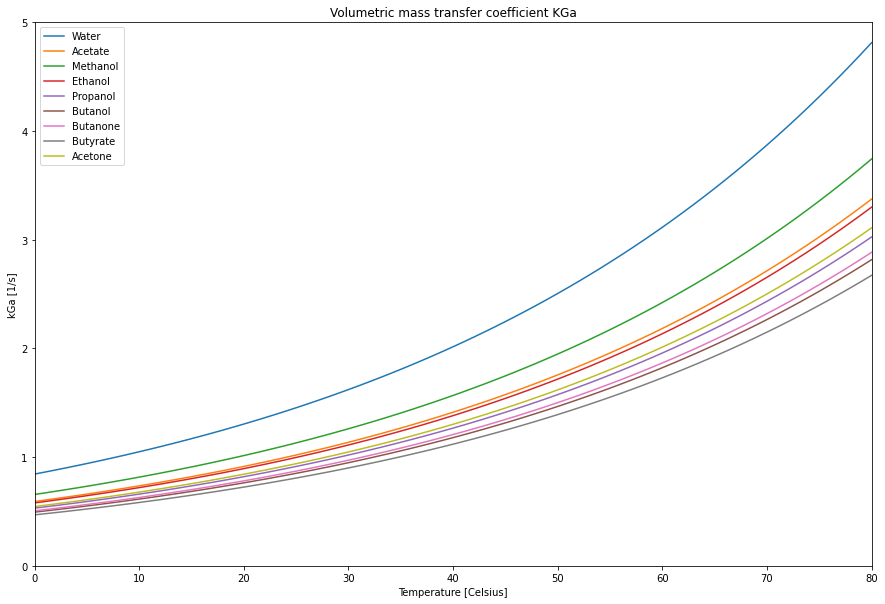

In [6]:
#t = np.arange(293.15, 332.15, 1)

fig = plt.figure(figsize=(15,10))

#Output results
#plt.subplot(1,2,1)
plt.title(f"Volumetric mass transfer coefficient KGa")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 5])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('kGa [1/s]')
plt.plot(Kelvin_Celsius(T), kGa(DGR_H2O, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Actt, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_MetOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_EtOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_PropOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_ButOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Butnon, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Butyrt, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Actn, T))
plt.legend(["Water","Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Butyrate","Acetone"])

In [7]:
#Enthalpy of vaporization
DH_vap_H2O = 4.3 * 10**4 #J/mol no single source, range 4.6-4.0 between 0-100°C
DH_vap_Actt = 5.16 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C64197&Units=SI&Mask=4#Thermo-Phase
DH_vap_MetOH = 3.76 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67561&Units=SI&Mask=4#Thermo-Phase
DH_vap_EtOH = 4.2 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Units=SI&Mask=4#Thermo-Phase
DH_vap_PropOH = 4.7 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C71238&Units=SI&Mask=4#Thermo-Phase
DH_vap_ButOH = 5.2 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C71363&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butnon = 3.4 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C78933&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butyrt = 5.9 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C107926&Units=SI&Mask=4#Thermo-Phase
DH_vap_Butdiol = 7.8 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C110634&Units=SI&Mask=4#Thermo-Phase
DH_vap_Actn = 3.1 * 10**4 #J/mol https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4#Thermo-Phase

#From: http://www.ddbst.com/en/EED/PCP/PCPindex.php
P0_H2O = 2400.0 # [Pa] at 293.15K http://www.ddbst.com/en/EED/PCP/VAP_C174.php
P0_Actt = 1.5 * 10**3  # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0363&p_version=2
P0_MetOH = 12.9 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0057&p_version=2
P0_EtOH = 5.8 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0044&p_version=2
P0_PropOH = 2.0 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_version=2&p_card_id=0553
P0_ButOH = 0.58 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0111&p_version=2
P0_Butnon = 10.5 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0179&p_version=2
P0_Butyrt = 57 #* 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=1334&p_version=2
P0_Butdiol = 10 #* 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0395&p_version=2
P0_Actn = 24 * 10**3 # [Pa] at 293.15K https://www.ilo.org/dyn/icsc/showcard.display?p_lang=en&p_card_id=0087&p_version=2

T0_PP = 293.15 # [K]

def Pt(P0, T0, DH_vap, t, x):
    C = np.log(P0) + DH_vap/(R*T0) #Calculate the constant C, the intersection with the y-axis
    return np.exp(-DH_vap/(R*t) + C) * x

#is this an alternative tot he Antoine equation? or is this the same?

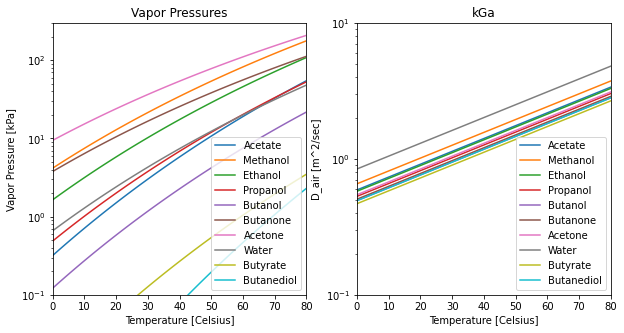

In [8]:
#t = np.arange(270, 355, 1)
    
fig = plt.figure(figsize=(10,5))

#Output results
plt.subplot(1,2,1)
plt.title(f"Vapor Pressures")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0.1, 300])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Vapor Pressure [kPa]')
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_PP, DH_vap_Actt, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_MetOH, T0_PP, DH_vap_MetOH, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_PropOH, T0_PP, DH_vap_PropOH, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_Butnon, T0_PP, DH_vap_Butnon, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_PP, DH_vap_Actn, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_Butyrt, T0_PP, DH_vap_Butyrt, T, 1)/1000)
plt.plot(Kelvin_Celsius(T), Pt(P0_Butdiol, T0_PP, DH_vap_Butdiol, T, 1)/1000)
plt.yscale("log")
plt.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Acetone","Water","Butyrate","Butanediol"])

plt.subplot(1,2,2)
plt.title(f"kGa")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0.1, 10])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('D_air [m^2/sec]')
plt.plot(Kelvin_Celsius(T), kGa(DGR_Actt, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_MetOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_EtOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_PropOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_ButOH, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Butnon, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Actn, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_H2O, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Butyrt, T))
plt.plot(Kelvin_Celsius(T), kGa(DGR_Butdiol, T))
plt.yscale("log")
plt.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Acetone","Water","Butyrate","Butanediol"])

#results for Butanediol confirmed in: BELIED SALEH KUWAIR, VAPOR PRESSURE OF SELECTED PURE MATERIALS AND MIXTURES
#results for acetone confirmed: http://ddbonline.ddbst.de/AntoineCalculation/AntoineCalculationCGI.exe?component=Acetone

In [9]:
def p_height(h):
    """
    This function calculates the pressure excerted by the column of water at a given depth
    """
    return 1000*9.81*h + P0

P0 = 101325
h = np.arange(0, 31, 1)

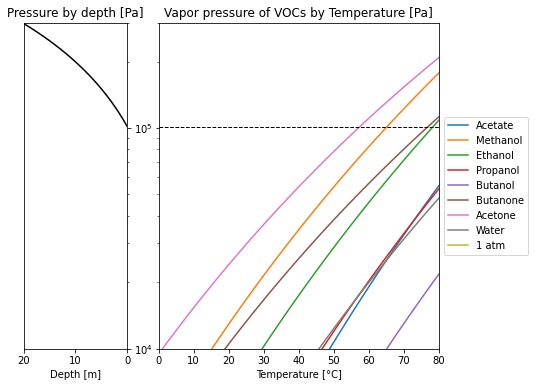

In [10]:
#Output results for publication
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 6), gridspec_kw={'width_ratios': [1, 3]})
ax1.axis([20, 0, 0.1, 400])
ax2.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 10000, 300000])
plt.subplots_adjust(wspace=0.15)
ax1.yaxis.tick_right()

#ax1.xlabel('Depth [m]')
ax1.set_title("Pressure by depth [Pa]")
ax1.plot(h,p_height(h), color = 'black')
ax1.set_xlabel('Depth [m]')

ax2.set_title("Vapor pressure of VOCs by Temperature [Pa]")
ax2.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_PP, DH_vap_Actt, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_MetOH, T0_PP, DH_vap_MetOH, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_PropOH, T0_PP, DH_vap_PropOH, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_Butnon, T0_PP, DH_vap_Butnon, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_PP, DH_vap_Actn, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_Butyrt, T0_PP, DH_vap_Butyrt, T, 1))
ax2.plot(Kelvin_Celsius(T), Pt(P0_Butdiol, T0_PP, DH_vap_Butdiol, T, 1))
ax2.axhline(y = 101325, color = 'black', linestyle = '--', linewidth = 1)
#ax2.axvline(x = 60, color = 'black', linestyle = '--', linewidth = 1)
ax2.set_xlabel('Temperature [°C]')

plt.yscale("log")

box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Acetone","Water","1 atm"],loc='center left', bbox_to_anchor=(1, 0.5))


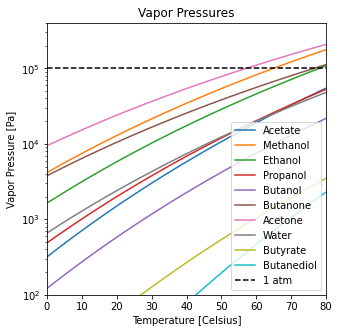

In [11]:
fig = plt.figure(figsize=(5,5))
plt.title(f"Vapor Pressures")
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 400000])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Vapor Pressure [Pa]')
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_PP, DH_vap_Actt, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_MetOH, T0_PP, DH_vap_MetOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_PropOH, T0_PP, DH_vap_PropOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butnon, T0_PP, DH_vap_Butnon, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_PP, DH_vap_Actn, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butyrt, T0_PP, DH_vap_Butyrt, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butdiol, T0_PP, DH_vap_Butdiol, T, 1))
plt.axhline(y = 101325, color = 'black', linestyle = '--')
plt.yscale("log")
plt.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Acetone","Water","Butyrate","Butanediol","1 atm"])#,"Butyrate","Butanediol"])


At a biologically reasonable concentration of product, what is the ratio of VOC to water in the off-gas?

Text(0, 0.5, 'Ratio on water [mol/mol]')

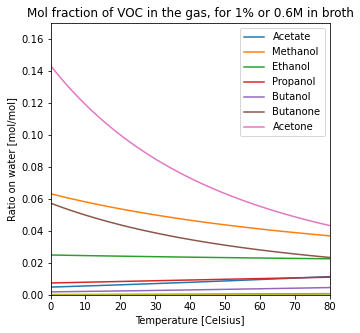

In [12]:
x = 0.01

plt.figure(figsize=(5,5))
plt.title(f"Mol fraction of VOC in the gas, for {round(x*100)}% or {round(x*c_H2O/1000,1)}M in broth")
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_PP, DH_vap_Actt, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_MetOH, T0_PP, DH_vap_MetOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_PropOH, T0_PP, DH_vap_PropOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butnon, T0_PP, DH_vap_Butnon, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_PP, DH_vap_Actn, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butyrt, T0_PP, DH_vap_Butyrt, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Butdiol, T0_PP, DH_vap_Butdiol, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 0.17])
plt.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Acetone"])#,"Butyrate","Butanediol"])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Ratio on water [mol/mol]')

Text(0, 0.5, 'Ratio on water [mol/mol]')

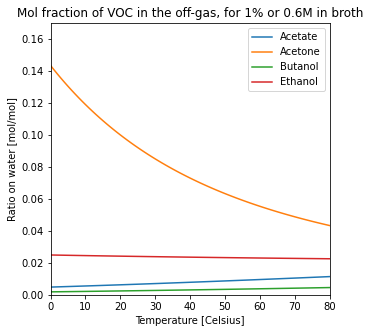

In [13]:
x = 0.01

plt.figure(figsize=(5,5))
plt.title(f"Mol fraction of VOC in the off-gas, for {round(x*100)}% or {round(x*c_H2O/1000,1)}M in broth")
plt.plot(Kelvin_Celsius(T), Pt(P0_Actt, T0_PP, DH_vap_Actt, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_Actn, T0_PP, DH_vap_Actn, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_ButOH, T0_PP, DH_vap_ButOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), Pt(P0_EtOH, T0_PP, DH_vap_EtOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 0.17])
plt.legend(["Acetate","Acetone","Butanol","Ethanol"])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Ratio on water [mol/mol]')

Text(0, 0.5, 'Ratio on water [mol/mol]')

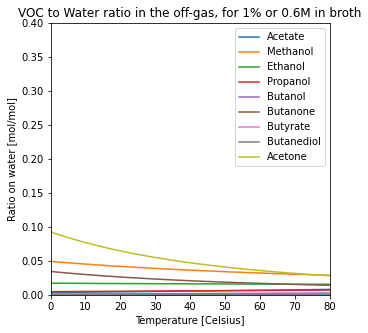

In [14]:
def R_evap(DGR, P0, T0, DH_vap, t, x):
    kGR = 2.78 * DGR**0.5 * v_gas**0.18
    kGTa = kGR * a * theta**(t-293.15) #[1/s]
    C = math.log(P0) + DH_vap/(R*T0)
    Pt = math.e**(-DH_vap/(R*t) + C) * x
    cG_sat = Pt/(R*t)
    return kGTa * (0-cG_sat)

x = 0.01

plt.figure(figsize=(5,5))
plt.title(f"VOC to Water ratio in the off-gas, for {round(x*100)}% or {round(x*c_H2O/1000,1)}M in broth")
plt.plot(Kelvin_Celsius(T), R_evap(DGR_Actt, P0_Actt, T0_PP, DH_vap_Actt, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_MetOH, P0_MetOH, T0_PP, DH_vap_MetOH, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_EtOH, P0_EtOH, T0_PP, DH_vap_EtOH, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_PropOH, P0_PropOH, T0_PP, DH_vap_PropOH, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_ButOH, P0_ButOH, T0_PP, DH_vap_ButOH, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_Butnon, P0_Butnon, T0_PP, DH_vap_Butnon, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_Butyrt, P0_Butyrt, T0_PP, DH_vap_Butyrt, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_Butdiol, P0_Butdiol, T0_PP, DH_vap_Butdiol, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.plot(Kelvin_Celsius(T), R_evap(DGR_Actn, P0_Actn, T0_PP, DH_vap_Actn, T, x)/R_evap(DGR_H2O, P0_H2O, T0_PP, DH_vap_H2O, T, 1))
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0, 0.4])
plt.legend(["Acetate","Methanol","Ethanol","Propanol","Butanol","Butanone","Butyrate","Butanediol","Acetone"])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Ratio on water [mol/mol]')

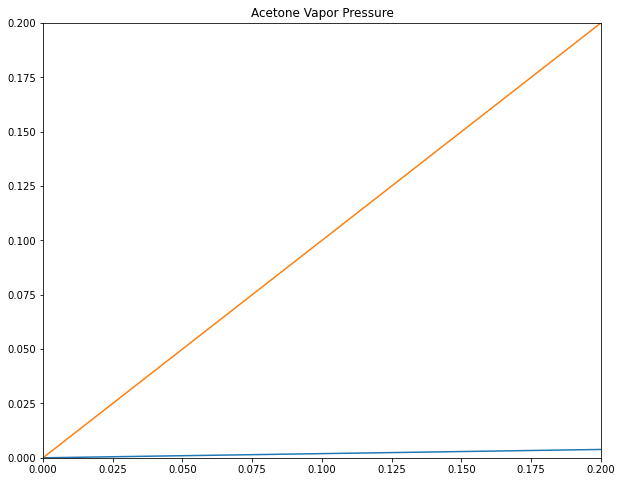

In [15]:
#ax1 = fig1.add_subplot(111)
T = Kelvin_Celsius(80)
x = np.arange(0, 1, 0.001)
fig1 = plt.figure(figsize=(10,8))
plt.title(f"Acetone Vapor Pressure")
plt.axis([0, 0.2, 0, 0.2])
plt.plot(Pt(P0_PropOH, T0_PP, DH_vap_PropOH, T, x)/Pt(P0_H2O, T0_PP, DH_vap_H2O, T, (1-x)),x)
plt.plot(x, x)
#plt.plot(x, Pt(60,x))
#plt.xlabel('Temperature [Kelvin]')
#plt.ylabel('Vapor pressure [kPa]')





#ax1.plot


In [16]:
Pt(P0_H2O, T0_PP, DH_vap_H2O, T, (1-x))

array([4.69409294e+22, 4.68939885e+22, 4.68470475e+22, 4.68001066e+22,
       4.67531657e+22, 4.67062248e+22, 4.66592838e+22, 4.66123429e+22,
       4.65654020e+22, 4.65184610e+22, 4.64715201e+22, 4.64245792e+22,
       4.63776383e+22, 4.63306973e+22, 4.62837564e+22, 4.62368155e+22,
       4.61898745e+22, 4.61429336e+22, 4.60959927e+22, 4.60490517e+22,
       4.60021108e+22, 4.59551699e+22, 4.59082290e+22, 4.58612880e+22,
       4.58143471e+22, 4.57674062e+22, 4.57204652e+22, 4.56735243e+22,
       4.56265834e+22, 4.55796425e+22, 4.55327015e+22, 4.54857606e+22,
       4.54388197e+22, 4.53918787e+22, 4.53449378e+22, 4.52979969e+22,
       4.52510559e+22, 4.52041150e+22, 4.51571741e+22, 4.51102332e+22,
       4.50632922e+22, 4.50163513e+22, 4.49694104e+22, 4.49224694e+22,
       4.48755285e+22, 4.48285876e+22, 4.47816467e+22, 4.47347057e+22,
       4.46877648e+22, 4.46408239e+22, 4.45938829e+22, 4.45469420e+22,
       4.45000011e+22, 4.44530601e+22, 4.44061192e+22, 4.43591783e+22,
      

In [17]:
Pt(P0_Actn, T0_PP, DH_vap_Actt, T, x)

array([0.00000000e+00, 3.38703569e+24, 6.77407138e+24, 1.01611071e+25,
       1.35481428e+25, 1.69351784e+25, 2.03222141e+25, 2.37092498e+25,
       2.70962855e+25, 3.04833212e+25, 3.38703569e+25, 3.72573926e+25,
       4.06444283e+25, 4.40314639e+25, 4.74184996e+25, 5.08055353e+25,
       5.41925710e+25, 5.75796067e+25, 6.09666424e+25, 6.43536781e+25,
       6.77407138e+25, 7.11277494e+25, 7.45147851e+25, 7.79018208e+25,
       8.12888565e+25, 8.46758922e+25, 8.80629279e+25, 9.14499636e+25,
       9.48369993e+25, 9.82240349e+25, 1.01611071e+26, 1.04998106e+26,
       1.08385142e+26, 1.11772178e+26, 1.15159213e+26, 1.18546249e+26,
       1.21933285e+26, 1.25320320e+26, 1.28707356e+26, 1.32094392e+26,
       1.35481428e+26, 1.38868463e+26, 1.42255499e+26, 1.45642535e+26,
       1.49029570e+26, 1.52416606e+26, 1.55803642e+26, 1.59190677e+26,
       1.62577713e+26, 1.65964749e+26, 1.69351784e+26, 1.72738820e+26,
       1.76125856e+26, 1.79512891e+26, 1.82899927e+26, 1.86286963e+26,
      

In [18]:
x

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,